<a href="https://colab.research.google.com/github/naveenkumar1805/Capstone_project_4-online-retail-customer-segmentation-/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [104]:
df=pd.read_excel("/content/drive/MyDrive/Copy of Online Retail.xlsx")


In [105]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [106]:
df.shape


(541909, 8)

In [107]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [108]:
len(df[df.duplicated()])

5268

In [109]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# **NULL values Treatment**

In [110]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [111]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('----'*25)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


# From above we can see that Customer Id have 24.93% null values and Description .27% . Customer Id is uniq values and this null values not affect our analysis so we can fill this null values with 0 value and we remove null values which description is null

Text(0.5, 1.0, ' Visualising Missing Values')

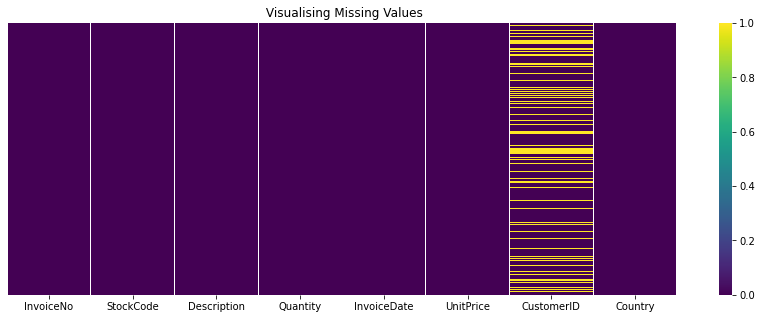

In [112]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='viridis',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

# Missing values in CustomerID and Description column.
# Customer Id is identification column , null values in column wont effect in analysis , so we drop all null values

In [113]:
df.dropna(inplace=True)

In [114]:
df.shape

(406829, 8)

In [115]:
# check null values after removing null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Duplicate values:**

In [116]:
# Check duplicate values in data
df.duplicated().sum()

5225

# We have found there are 5225 rows which having duplicate values so we decided to remove these rows

In [117]:
df=df[~df.duplicated()]

In [118]:
# after removing duplicate values we check the shape of data
df.shape

(401604, 8)

In [119]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


# Here we can see that min value for Quantity column is negative.
# UnitPrice has 0 as min value
# Need to Explore these columns

In [120]:
# lets check dataframe have negative valiues in quantity

df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


# Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop

In [121]:
# changing the datatype to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [140]:
# String to be searched in start of string 
search ="C"
  
# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount


In [ ]:
cancel_order.shape

In [ ]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

In [ ]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [ ]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

In [ ]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [122]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
df=df[~df['InvoiceNo'].str.contains('C')]

In [123]:
# Checking how many values are present for unitprice==0

len(df[df['UnitPrice']==0])

40

# almost 40 values are present so will drop this values

In [124]:
# taking unitprice values greater than 0.
df=df[df['UnitPrice']>0]
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [125]:
df.shape

(392692, 8)

In [126]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# **Feature Engineering:**

In [127]:
print(df[df['InvoiceDate']=='12/13/10 9:02'].index.values)

[26732 26733 26734 26735 26736 26737 26738 26739 26740 26741 26742 26743
 26744 26745 26746 26747 26748]


In [129]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m-%d-%Y %H:%M")

In [132]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [133]:
# extracting month from the Invoice date
df['Month']=df['InvoiceDate'].dt.month_name()

In [134]:
# extracting day from the Invoice date
df['Day']=df['InvoiceDate'].dt.day_name()

In [136]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [138]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


In [139]:
df.year.unique()

array([2010, 2011])